In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def generate_arrow(a, b, gamma):
    sorted_a = np.sort(a)
    n = a.shape[0] + 1
    arrow = np.zeros((n, n))
    if not np.all(np.greater(b, 0)):
        raise UserWarning("All of b's entries must be > 0")
    diag_arrow = np.concatenate((a, np.array([gamma])))
    np.fill_diagonal(arrow, diag_arrow)
    arrow[-1, :n - 1] = b
    arrow[:n - 1, -1] = b.T
    return arrow

In [12]:
n = 1000
a = np.array([2*n - i for i in range(0, n-1)])
b = np.array([n - i for i in range(0, n-1)])
gamma = 1
test_arrow = generate_arrow(a, b, gamma)
n = a.shape[0] + 1

In [13]:
test_arrow

array([[  2.00000000e+03,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+03],
       [  0.00000000e+00,   1.99900000e+03,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   9.99000000e+02],
       [  0.00000000e+00,   0.00000000e+00,   1.99800000e+03, ...,
          0.00000000e+00,   0.00000000e+00,   9.98000000e+02],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.00300000e+03,   0.00000000e+00,   3.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   1.00200000e+03,   2.00000000e+00],
       [  1.00000000e+03,   9.99000000e+02,   9.98000000e+02, ...,
          3.00000000e+00,   2.00000000e+00,   1.00000000e+00]])

In [14]:
w, v = np.linalg.eig(test_arrow)

In [15]:
w

array([-17417.28918987,  19168.84185072,   1002.00000794,   1003.00001784,
         1004.00003165,   1005.00004935,   1006.00007091,   1007.00009632,
         1008.00012554,   1009.00015855,   1010.00019533,   1011.00023585,
         1019.00069168,   1012.00028009,   1013.00032801,   1014.0003796 ,
         1015.00043484,   1018.00062213,   1016.00049369,   1017.00055613,
         1999.84074184,   1998.81754592,   1997.80263819,   1996.79118421,
         1995.78168468,   1994.77346416,   1993.76615564,   1992.75953549,
         1991.75345641,   1990.7478157 ,   1989.74253863,   1988.73756895,
         1987.73286315,   1986.7283868 ,   1985.72411213,   1984.7200164 ,
         1983.71608071,   1982.71228918,   1981.7086283 ,   1980.7050865 ,
         1979.70165375,   1978.69832133,   1977.69508157,   1976.69192772,
         1975.68885377,   1974.68585437,   1973.68292471,   1972.68006048,
         1971.67725776,   1970.67451302,   1969.67182302,   1968.66918481,
         1967.6665957 ,  

In [6]:
def spectral_func(a, b, gamma, lamb):
    b_sqr = np.power(b, 2)
    sum_term = np.sum(b_sqr / (a - lamb))
    return lamb - gamma + sum_term

In [19]:
# Verification for the result yielded by the program in cuda C:
x = np.zeros((n, ))
for i in range(1, n-1):
    x[i] = (a[i - 1] + a[i]) / 2
x[0] = a[0] + 5
x[n-1] = a[n-2] -5
print(x)
print([spectral_func(a, b, gamma, t) for t in x])
print([spectral_func_prime(a, b, t) for t in x])

[25.  19.5 18.5 17.5 16.5 15.5 14.5 13.5 12.5  7. ]
[-33.7800949050949, -26.434976134976132, 58.14983904983908, 99.2012987012987, 118.61111111111109, 124.72222222222223, 121.96753246753248, 113.23411033411033, 100.77250527250527, 42.871203796203794]
[10.234591937435967, 766.2708423383083, 656.205357222913, 526.8827982983828, 405.17104560342653, 297.44593600403124, 206.0102749198853, 131.85393257178805, 75.28027972816518, 4.744741652855414]


In [8]:
def spectral_func_prime(a, b, lamb):
    b_sqr = np.power(b, 2)
    a_minus_lamb_sqr = np.power(a - lamb, 2)
    sum_term = np.sum(b_sqr / a_minus_lamb_sqr)
    return 1 + sum_term

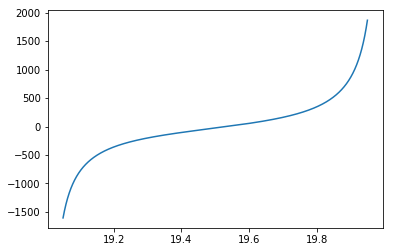

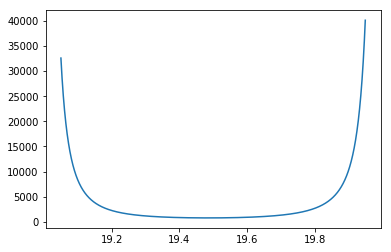

In [9]:
# Plot the functions between a[0] and a[1]
test_spectral = lambda x: spectral_func(a, b, gamma, x)

# Prime derivative
test_spectral_prime = lambda x: spectral_func_prime(a, b, x)

# Slight perturbation to avoid divergence on the plot
epsilon = 0.05
linspace = np.linspace(a[1] + epsilon, a[0] - epsilon, 10000)

# Compute the values and plot the original function
values = [test_spectral(x) for x in linspace]
plt.figure()
plt.plot(linspace, values)

# Compute the values and plot the derivative
values_prime = [test_spectral_prime(x) for x in linspace]
plt.figure()
plt.plot(linspace, values_prime)

# Show
plt.show()

In [10]:
def interior_sigma_coef(a, b, gamma, x, k):
    first_term = 3 * x - (gamma + a[k - 1] + a[k])
    to_sum1 = np.power(b, 2) / (a - x)
    to_sum2 = (a - a[k-1]) / (a - x)
    to_sum3 = (a - a[k]) / (a - x)
    return first_term + np.sum(to_sum1 * to_sum2 * to_sum3)

In [11]:
def interior_omega1_coef(a, b, gamma, x, k):
    a_reduced = np.delete(a, k - 1)
    b_reduced = np.delete(b, k - 1)
    to_sum1 = np.power(b_reduced, 2) / np.power(a_reduced - x, 2)
    to_sum2 = (a_reduced - a[k]) / (a_reduced - x)
    fac = np.power(a[k - 1] - x, 3) / (a[k - 1] - a[k])
    return b[k - 1] ** 2 + fac * (1 + np.sum(to_sum1 * to_sum2))

In [12]:
def interior_omega2_coef(a, b, gamma, x, k):
    a_reduced = np.delete(a, k)
    b_reduced = np.delete(b, k)
    to_sum1 = np.power(b_reduced, 2) / np.power(a_reduced - x, 2)
    to_sum2 = (a_reduced - a[k - 1]) / (a_reduced - x)
    fac = np.power(x - a[k], 3) / (a[k - 1] - a[k])
    return b[k] ** 2 + fac * (1 + np.sum(to_sum1 * to_sum2))

In [13]:
def rationnal_interpolation(a, b, gamma, x, y, k) : 
    sig = interior_omega1_coef(a, b, gamma, x, k)
    omega1 = interior_omega1_coef(a, b, gamma, x, k)
    omega2 = interior_omega2_coef(a, b, gamma, x, k)
    return sig + omega1 / (a[k-1] - y) + omega1 / (a[k] - y)

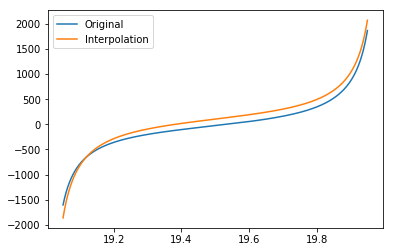

In [14]:
# Plot the rationnal interpolation between a[0] and a[1] in (a[0] + a[1]) / 2
x0 = (a[0] + a[1]) / 2

# Slight perturbation to avoid divergence on the plot
epsilon = 0.05
linspace = np.linspace(a[1] + epsilon, a[0] - epsilon, 1000)

# Rationnal interpolation
test_inter = lambda y: rationnal_interpolation(a, b, gamma, x0, y, 1)
values_inter = [test_inter(y) for y in linspace]

# Original function within the same bounds
test_spectral = lambda x: spectral_func(a, b, gamma, x)
values = [test_spectral(x) for x in linspace]

# Show
plt.plot(linspace, values, label="Original")
plt.plot(linspace, values_inter, label="Interpolation")
plt.legend()
plt.show()

In [15]:
def interior_alpha(a, b, gamma, x, k):
    sig = interior_sigma_coef(a, b, gamma, x, k)
    deno = (a[k - 1] - x) * (x - a[k])
    return sig / deno

In [16]:
def interior_beta(a, b, gamma, x, k):
    prime = spectral_func_prime(a, b, x)
    fac = (1 / (a[k - 1] - x)) + (1 / (a[k] - x))
    func = spectral_func(a, b, gamma, x)
    return prime - fac * func

In [18]:
# Verification for the result yielded by the program in cuda C:
x = np.zeros((n, ))
for i in range(1, n-1):
    x[i] = (a[i - 1] + a[i]) / 2
x[0] = a[0] + 5
x[n-1] = a[n-2] -5
print(x)
print([interior_sigma_coef(a, b, gamma, x[k], k) for k in range(1, n-1)])
print([interior_alpha(a, b, gamma, x[k], k) for k in range(1, n-1)])

[25.  19.5 18.5 17.5 16.5 15.5 14.5 13.5 12.5  7. ]
[-58.59713031772738, 21.154894609914255, 64.79196170503867, 88.16258391422411, 98.67444976344447, 100.50186944256433, 96.42851127756873, 88.61381235610536]
[-234.3885212709095, 84.61957843965702, 259.1678468201547, 352.65033565689646, 394.6977990537779, 402.0074777702573, 385.7140451102749, 354.4552494244214]


In [20]:
def interior_increment(a, b, gamma, x, k):
    f = spectral_func(a, b, gamma, x)
    beta = interior_beta(a, b, gamma, x, k)
    alpha = interior_alpha(a, b, gamma, x, k)
    term1 = 2 * f / beta
    term2 = 2 * alpha / beta
    deno = 1 + np.sqrt(1 + term1 * term2)
    return term1 / deno

In [45]:
def interior_zero_finder(a, b, gamma, x0, k, epsilon=0.000001, maxit=10000):
    i = 0
    dist = np.inf
    x = x0
    func_track = []
    x_track = []
    x_track.append(x0)
    func = spectral_func(a, b, gamma, x) 
    func_track.append(func)
    dist = func ** 2
    while (dist > epsilon) and (i < maxit):
        delta = interior_increment(a, b, gamma, x, k)
        x -= delta
        func = spectral_func(a, b, gamma, x) 
        dist = func ** 2
        func_track.append(func)
        x_track.append(x)
    return x, x_track, func_track

In [46]:
# Verification for the result yielded by the program in cuda C:
x = np.zeros((n, ))
for i in range(1, n-1):
    x[i] = (a[i - 1] + a[i]) / 2
x[0] = a[0] + 5
x[n-1] = a[n-2] -5
interior_zeros_list = []
for k in range(1, n-1):
    xopt, xtrack, functrack = interior_zero_finder(a, b, gamma, x[k], k)
    interior_zeros_list.append(xopt)
print(interior_zeros_list)

[19.534149402457878, 18.412100122600613, 17.32419376250485, 16.252151433710413, 15.18981925383949, 14.134600930693026, 13.08570317358234, 12.04393665330867]


In [47]:
# Check if the spectral function is close to zeros at the roots
error_list = [spectral_func(a, b, gamma, xopt) for xopt in interior_zeros_list]
print(error_list)

[-5.293543381412746e-13, 5.7279905263385444e-09, 3.6937940421921667e-06, 6.27422229673158e-05, 0.0003024516876326544, 0.0007767915771488276, 6.945555242054979e-13, -4.902744876744691e-13]
